In [7]:
!pip uninstall umap
!pip3 install umap-learn

^C
     --------------------------------------- 90.9/90.9 kB 72.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 55.8/55.8 kB 364.5 kB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86930 sha256=151bcb5a9634c70b4cae31a281a78aa963c6b0c9cfa72afdf75b077eccb63312
  Stored in directory: c:\users\aishwarya tandel\appdata\local\pip\cache\wheels\0f\01\17\26951217a11fb724b7027c6dd5b620b6d368104f7e6d4171fc
Successfully built umap-learn


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as UMAP
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [12]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\Aishwarya Tandel\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


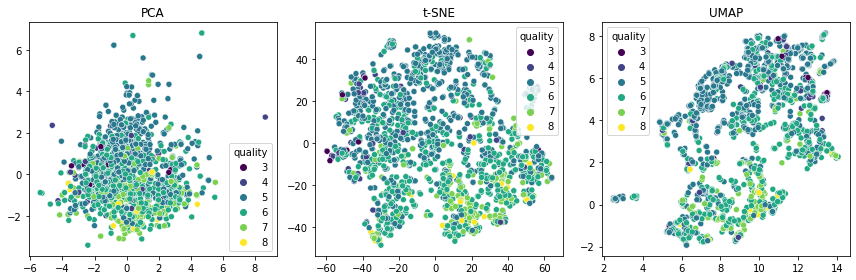

In [14]:
# Separate features and the quality column
features = data.drop('quality', axis=1)
quality = data['quality']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA, t-SNE, and UMAP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

umap = UMAP.UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(scaled_features)

# Plotting PCA
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=quality, palette='viridis', legend='full')
plt.title('PCA')

# Plotting t-SNE
plt.subplot(132)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=quality, palette='viridis', legend='full')
plt.title('t-SNE')

# Plotting UMAP
plt.subplot(133)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=quality, palette='viridis', legend='full')
plt.title('UMAP')

plt.tight_layout()
plt.show()


In [16]:
from scipy import stats

# Extract the data for volatile acidity and wine quality
volatile_acidity = data['volatile acidity']
wine_quality = data['quality']

# Divide the dataset into groups based on wine quality (e.g., low quality vs. high quality)
low_quality = volatile_acidity[wine_quality <= 5]  # Example: Low-quality wine
high_quality = volatile_acidity[wine_quality > 5]  # Example: High-quality wine

# Perform t-test
t_statistic, p_value = stats.ttest_ind(low_quality, high_quality, equal_var=False)

# Determine significance
alpha = 0.05  # Significance level
print(p_value)
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in wine quality based on volatile acidity.")
else:
    print("Fail to Reject Null Hypothesis: There may not be a significant difference in wine quality based on volatile acidity.")


3.480735328877281e-39
Reject Null Hypothesis: There is a significant difference in wine quality based on volatile acidity.
